# Clustering 

## Non hierarchical clustering algorithm 

### K-means

Text(0.5, 1.0, 'K=4, J=28.03')

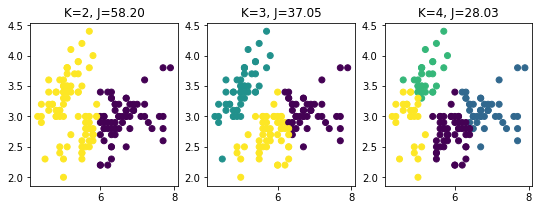

In [13]:
from sklearn import cluster, datasets
import matplotlib.pyplot as plt
import seaborn as sns # nice color
import numpy as np
import scipy
%matplotlib inline
iris = datasets.load_iris()
X = iris.data[:, :2] # use only 'sepal length and sepal width'
y_iris = iris.target
km2 = cluster.KMeans(n_clusters=2).fit(X)
km3 = cluster.KMeans(n_clusters=3).fit(X)
km4 = cluster.KMeans(n_clusters=4).fit(X)

plt.figure(figsize=(9, 3))
plt.subplot(131)
plt.scatter(X[:, 0], X[:, 1], c=km2.labels_)
plt.title("K=2, J=%.2f" % km2.inertia_)
plt.subplot(132)
plt.scatter(X[:, 0], X[:, 1], c=km3.labels_)
plt.title("K=3, J=%.2f" % km3.inertia_)
plt.subplot(133)
plt.scatter(X[:, 0], X[:, 1], c=km4.labels_)#.astype(np.float))
plt.title("K=4, J=%.2f" % km4.inertia_)

#### Model selection Elbow method 

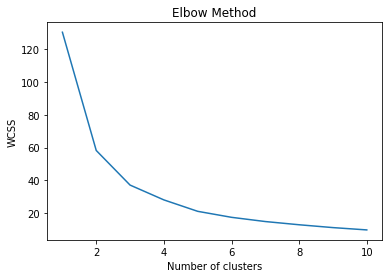

In [20]:
wcss = []
for i in range(1, 11):
    kmeans = cluster.KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [14]:
# utils fonction to plot ellipse
from matplotlib.patches import Ellipse
def plot_cov_ellipse(cov, pos, nstd=2, ax=None, **kwargs):
    """
    Plots an `nstd` sigma error ellipse based on the specified covariance
    matrix (`cov`). Additional keyword arguments are passed on to the 
    ellipse patch artist.
    Parameters
    ----------
        cov : The 2x2 covariance matrix to base the ellipse on
        pos : The location of the center of the ellipse. Expects a 2-element
            sequence of [x0, y0].
        nstd : The radius of the ellipse in numbers of standard deviations.
            Defaults to 2 standard deviations.
        ax : The axis that the ellipse will be plotted on. Defaults to the 
            current axis.
        Additional keyword arguments are pass on to the ellipse patch.
    Returns
    -------
        A matplotlib ellipse artist
    """
    def eigsorted(cov):
        vals, vecs = np.linalg.eigh(cov)
        order = vals.argsort()[::-1]
        return vals[order], vecs[:,order]

    if ax is None:
        ax = plt.gca()

    vals, vecs = eigsorted(cov)
    theta = np.degrees(np.arctan2(*vecs[:,0][::-1]))

    # Width and height are "full" widths, not radius
    width, height = 2 * nstd * np.sqrt(vals)
    ellip = Ellipse(xy=pos, width=width, height=height, angle=theta, **kwargs)

    ax.add_artist(ellip)
    return ellip

### GaussianMixture

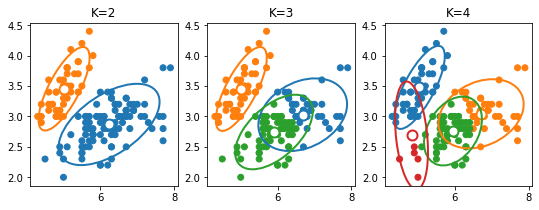

In [15]:
from sklearn.mixture import GaussianMixture
colors = sns.color_palette()
iris = datasets.load_iris()
X = iris.data[:, :2] # 'sepal length (cm)''sepal width (cm)'
y_iris = iris.target

gmm2 = GaussianMixture(n_components=2, covariance_type='full').fit(X)
gmm3 = GaussianMixture(n_components=3, covariance_type='full').fit(X)
gmm4 = GaussianMixture(n_components=4, covariance_type='full').fit(X)
plt.figure(figsize=(9, 3))
plt.subplot(131)
plt.scatter(X[:, 0], X[:, 1], c=[colors[lab] for lab in gmm2.predict(X)])#, color=colors)
for i in range(gmm2.covariances_.shape[0]):
    plot_cov_ellipse(cov=gmm2.covariances_[i, :], pos=gmm2.means_[i,:], 
                                          facecolor='none', linewidth=2, edgecolor=colors[i])
    plt.scatter(gmm2.means_[i, 0], gmm2.means_[i, 1], edgecolor=colors[i],
                marker="o", s=100, facecolor="w", linewidth=2)
plt.title("K=2")
plt.subplot(132)
plt.scatter(X[:, 0], X[:, 1], c=[colors[lab] for lab in gmm3.predict(X)])
for i in range(gmm3.covariances_.shape[0]):
    plot_cov_ellipse(cov=gmm3.covariances_[i, :], pos=gmm3.means_[i,:],
                                          facecolor='none', linewidth=2, edgecolor=colors[i])
    plt.scatter(gmm3.means_[i, 0], gmm3.means_[i, 1], edgecolor=colors[i],
                marker="o", s=100, facecolor="w", linewidth=2)
plt.title("K=3")
plt.subplot(133)
plt.scatter(X[:, 0], X[:, 1], c=[colors[lab] for lab in gmm4.predict(X)]) # .astype(np.float))
for i in range(gmm4.covariances_.shape[0]):
    plot_cov_ellipse(cov=gmm4.covariances_[i, :], pos=gmm4.means_[i,:],
                                          facecolor='none', linewidth=2, edgecolor=colors[i])
    plt.scatter(gmm4.means_[i, 0], gmm4.means_[i, 1], edgecolor=colors[i],
                marker="o", s=100, facecolor="w", linewidth=2)
_ = plt.title("K=4")

#### Model selection

And what about elbow methode for k-means ? 

Choose k= 2


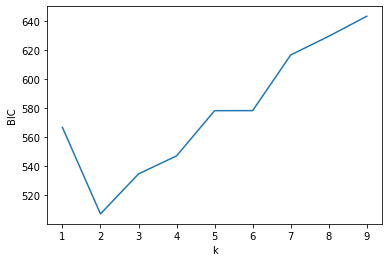

In [17]:
# Model selection
bic = list()
#print(X)
ks = np.arange(1, 10)
for k in ks:
    gmm = GaussianMixture(n_components=k, covariance_type='full')
    gmm.fit(X)
    bic.append(gmm.bic(X))
k_chosen = ks[np.argmin(bic)]
plt.plot(ks, bic)
plt.xlabel("k")
plt.ylabel("BIC")
print("Choose k=", k_chosen)

## Hierarchical clustering

Hierarchical clustering is an approach to clustering that build hierarchies of clusters in two main
approaches:

 • Agglomerative: A bottom-up strategy, where each observation starts in their own cluster,
and pairs of clusters are merged upwards in the hierarchy.
 
 • Divisive: A top-down strategy, where all observations start out in the same cluster, and
then the clusters are split recursively downwards in the hierarchy.

### Ward clustering

Text(0.5, 1.0, 'K=4')

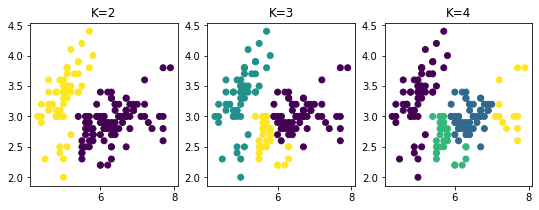

In [22]:
iris = datasets.load_iris()
X = iris.data[:, :2] # 'sepal length (cm)''sepal width (cm)'
y_iris = iris.target
ward2 = cluster.AgglomerativeClustering(n_clusters=2, linkage='ward').fit(X)
ward3 = cluster.AgglomerativeClustering(n_clusters=3, linkage='ward').fit(X)
ward4 = cluster.AgglomerativeClustering(n_clusters=4, linkage='ward').fit(X)
plt.figure(figsize=(9, 3))
plt.subplot(131)
plt.scatter(X[:, 0], X[:, 1], c=ward2.labels_)
plt.title("K=2")
plt.subplot(132)
plt.scatter(X[:, 0], X[:, 1], c=ward3.labels_)
plt.title("K=3")
plt.subplot(133)
plt.scatter(X[:, 0], X[:, 1], c=ward4.labels_) # .astype(np.float))
plt.title("K=4")

## Exercises
Perform clustering of the iris dataset based on all variables using Gaussian mixture models. Use
PCA to visualize clusters.